Dataset shape: (40, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes
None

Missing values:
Experience Years    0
Salary              0
dtype: int64

Summary:
       Experience Years         Salary
count         40.000000      40.000000
mean           5.152500   74743.625000
std            2.663715   25947.122885
min            1.100000   37731.000000
25%            3.200000   56878.250000
50%            4.600000   64472.500000
75%            6.875000   95023.250000
max           10.500000  122391.000000


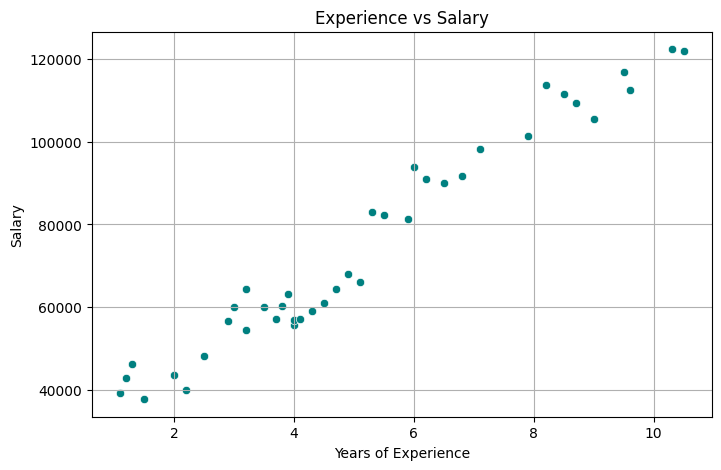

Training samples: 32
Testing samples: 8
Model trained.
Intercept: 26716.250176145535
Coefficient: 9408.03127250658
    Experience  Actual Salary  Predicted Salary
19         4.5          61111      69052.390902
16         4.0          56957      64348.375266
15         4.0          55794      64348.375266
26         6.0          93940      83164.437811
4          2.0          43525      45532.312721


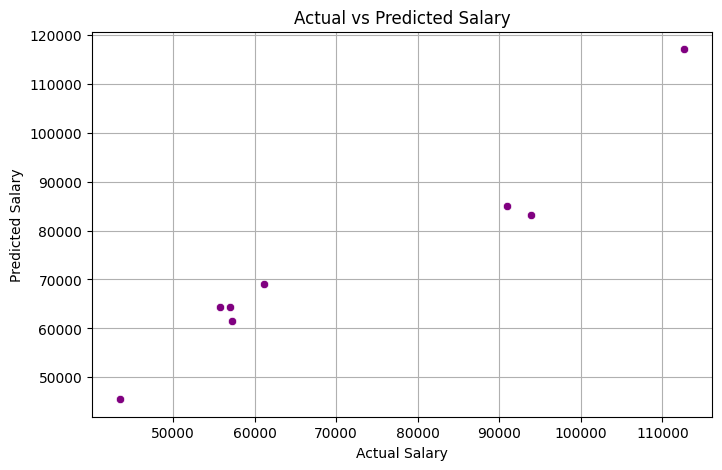


Mean Absolute Error: 6419.91
Mean Squared Error: 48077731.17
Root Mean Squared Error: 6933.81
R2 Score: 0.91


In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset from a GitHub URL
url = "https://raw.githubusercontent.com/ybifoundation/Dataset/main/Salary%20Data.csv"
df = pd.read_csv(url)

# Show the first 5 rows
df.head()

# Shape of the dataset
print("Dataset shape:", df.shape)

# Column names and data types
print("\nInfo:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary:")
print(df.describe())

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Experience Years', y='Salary', data=df, color='teal')
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Define X and y
X = df[['Experience Years']]  # input features
y = df['Salary']              # target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Model trained.")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Predict using the model
y_pred = model.predict(X_test)

# Compare predictions with actual values
results = pd.DataFrame({'Experience': X_test['Experience Years'], 'Actual Salary': y_test, 'Predicted Salary': y_pred})
print(results.head())

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")




